# <b>Topic</b>: Extract Data from a commercial platform for used cars to figure out which type of used cars fit my demand the most.

<b>Skills applied:</b> Web scrapping with Pagination / Basic Data Analysis with Pandas

<b>Website used:</b> www.autoscout24.de

<b>Criteria for choosing the desired car:</b>
>-  BMW
>-  Model 320
>-  Gasoline
>-  Milage Status: less then 100,000 Km
>-  Search in Germany
>-  First Registration: 2019 or newer

In [1]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
#I put the filters corresponding to the criteria stated in the beginning the loop over the pages starting from page 1
page = 1
url = "https://www.autoscout24.de/lst/bmw/320?atype=C&cy=D&damaged_listing=exclude&desc=0&fregfrom=2019&fuel=B&kmto=100000&ocs_listing=include&page=" + str(page) + "&powertype=kw&search_id=17yjpgy01io&sort=standard&source=listpage_pagination&ustate=N%2CU"
data = requests.get(url)
html = BeautifulSoup(data.content, 'html.parser')


In [3]:
#Each item as shown below is stored under div with class_="ListItem_wrapper__TxHWu"
#We'll find all of these and loop over them to extract the necessary info of each one
items = html.find_all('div', class_="ListItem_wrapper__TxHWu")
items_length = len(items)
print(f"There are {items_length} items on page {page}")

There are 19 items on page 1


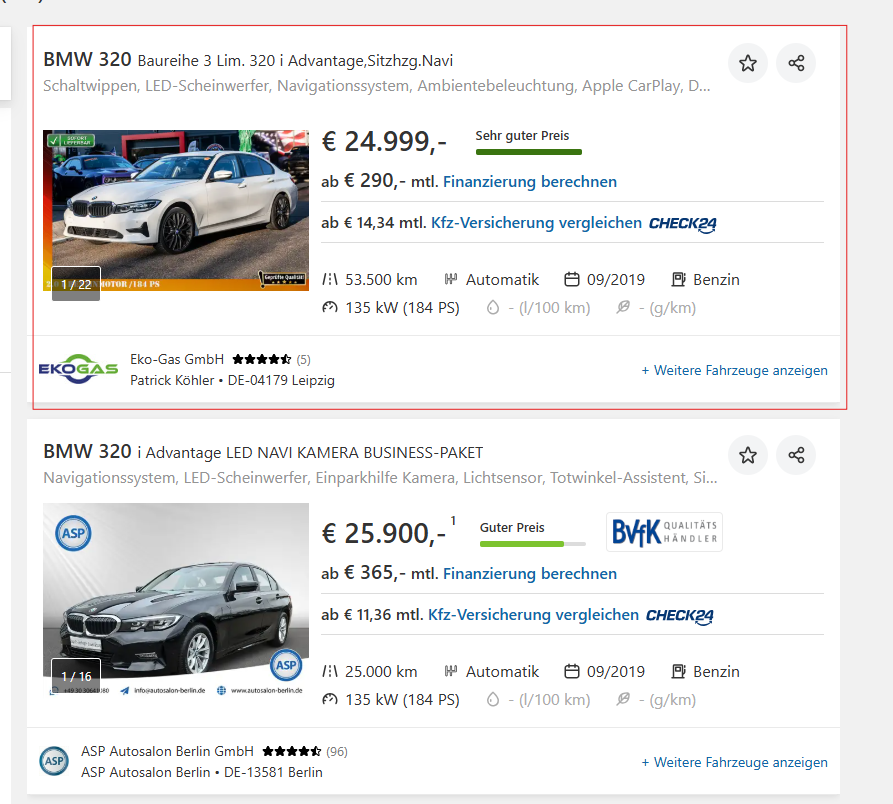

In [122]:
#Within each item, car name is stored under h2
#Car price is store under "p" with class "Price_price__APlgs PriceAndSeals_current_price__ykUpx"

#Car name
print(f"Car name is: {items[0].find('h2').text}")
#Car Price
print(f"Car price is: {items[0].find('p', class_ = 'Price_price__APlgs PriceAndSeals_current_price__ykUpx').text}")

Car name is: BMW 320 Baureihe 3 Lim. 320 i Advantage,Sitzhzg.Navi
Car price is: € 24.999,-


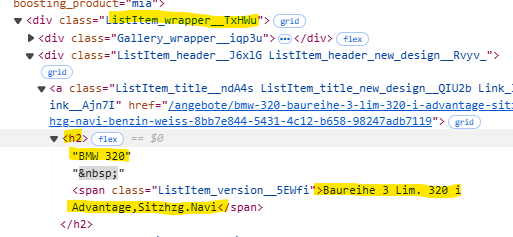

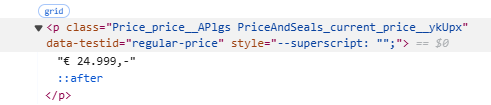

In [121]:
#Other details of the car are stored under 'span', class_="VehicleDetailTable_item__4n35N"
details = items[0].find_all('span', class_="VehicleDetailTable_item__4n35N")
details
for detail in details:
    print(detail.text)

53.500 km
Automatik
09/2019
Benzin
135 kW (184 PS)
- (l/100 km)
- (g/km)


In [3]:
#With the above exploration, we will loop over each item in items on page 1 and then loop over the next page and repeat the process until we reach the last page
#We create a nested list containing sublists, each of which contains the information of one item
items = html.find_all('div', class_="ListItem_wrapper__TxHWu")
items_length = len(items)
lst = []

while items_length > 0:
    print(f"There are {items_length} items on page {page}")
    for item in items:
        sub_lst = []

        car_name = item.find('h2')
        sub_lst.append(car_name.text)

        car_price = item.find('p', class_="Price_price__APlgs PriceAndSeals_current_price__ykUpx")
        sub_lst.append(car_price.text)

        other_details = item.find_all('span', class_="VehicleDetailTable_item__4n35N")
        for detail in other_details:
            sub_lst.append(detail.text)
        
        lst.append(sub_lst)

    page += 1
    url = "https://www.autoscout24.de/lst/bmw/320?atype=C&cy=D&damaged_listing=exclude&desc=0&fregfrom=2019&fuel=B&kmto=100000&ocs_listing=include&page=" + str(page) + "&powertype=kw&search_id=17yjpgy01io&sort=standard&source=listpage_pagination&ustate=N%2CU"
    data = requests.get(url)
    html = BeautifulSoup(data.content, 'html.parser')
    items = html.find_all('div', class_="ListItem_wrapper__TxHWu")
    items_length = len(items)

#There are more than 700 results, however, because of the default setup of the website, the page limit is 20, so below is all we can extract.

There are 19 items on page 1
There are 20 items on page 2
There are 20 items on page 3
There are 20 items on page 4
There are 20 items on page 5
There are 20 items on page 6
There are 20 items on page 7
There are 20 items on page 8
There are 20 items on page 9
There are 20 items on page 10
There are 20 items on page 11
There are 20 items on page 12
There are 20 items on page 13
There are 20 items on page 14
There are 20 items on page 15
There are 20 items on page 16
There are 20 items on page 17
There are 20 items on page 18
There are 20 items on page 19
There are 20 items on page 20


In [4]:
#Put them into DataFrame
df = pd.DataFrame(lst)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,"BMW 320 Baureihe 3 Lim. 320 i Advantage,Sitzhz...","€ 24.999,-",53.500 km,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
1,BMW 320 320i Gran Turismo Sport Line*Automatik...,"€ 23.890,-",45.383 km,Automatik,05/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
2,BMW 320 i Advantage LED NAVI KAMERA BUSINESS-P...,"€ 25.900,-",25.000 km,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
3,BMW 320 i Aut. M Sport,"€ 29.890,-",65.900 km,Automatik,06/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
4,BMW 320 i M Sport*Glasdach*ACC*Kamera*AHK*HiFi*,"€ 33.980,-",54.272 km,Automatik,04/2023,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None


In [5]:
#Set column names
df = pd.DataFrame(lst, columns=["Name", "Price €", "Kilometer", "Gear Type", "First Registration", "Gas Type", "Power", "Energy Efficiency", "Environment Index", "CO2"])
df.head()

,Name,Price €,Kilometer,Gear Type,First Registration,Gas Type,Power,Energy Efficiency,Environment Index,CO2
0,"BMW 320 Baureihe 3 Lim. 320 i Advantage,Sitzhz...","€ 24.999,-",53.500 km,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
1,BMW 320 320i Gran Turismo Sport Line*Automatik...,"€ 23.890,-",45.383 km,Automatik,05/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
2,BMW 320 i Advantage LED NAVI KAMERA BUSINESS-P...,"€ 25.900,-",25.000 km,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
3,BMW 320 i Aut. M Sport,"€ 29.890,-",65.900 km,Automatik,06/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
4,BMW 320 i M Sport*Glasdach*ACC*Kamera*AHK*HiFi*,"€ 33.980,-",54.272 km,Automatik,04/2023,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None


In [6]:
#Transform Price column
# 'str' method allows us to use 'extractall' function, which has Regex in it.
# '(\d+)' will extract only digits within the string.
#If the string is separated by other characters, the method above will put them into multi-index structure, unstack() will return a new DataFrame with stacked indexes being leveled out into multiple columns ==> that means each part containing numbers will be stored in each column
#sum(axis=1) in this case will concatenate all those columns containing numbers into 1 column and transform it into number type
df["Price €"] = df["Price €"].str.extractall('(\d+)').unstack().sum(axis=1)
df.head()

,Name,Price €,Kilometer,Gear Type,First Registration,Gas Type,Power,Energy Efficiency,Environment Index,CO2
0,"BMW 320 Baureihe 3 Lim. 320 i Advantage,Sitzhz...",24999.0,53.500 km,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
1,BMW 320 320i Gran Turismo Sport Line*Automatik...,23890.0,45.383 km,Automatik,05/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
2,BMW 320 i Advantage LED NAVI KAMERA BUSINESS-P...,25900.0,25.000 km,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
3,BMW 320 i Aut. M Sport,29890.0,65.900 km,Automatik,06/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
4,BMW 320 i M Sport*Glasdach*ACC*Kamera*AHK*HiFi*,33980.0,54.272 km,Automatik,04/2023,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None


In [7]:
#Transform Kilometer column
#Same method as above
#Here we additionally have fillna("0") because some rows will have null values, and we should fill those null as 0, which subsequently makes sum(axis=1) work
df["Kilometer"] = df["Kilometer"].str.extractall('(\d+)').unstack().fillna("0").sum(axis=1)
df.head()

,Name,Price €,Kilometer,Gear Type,First Registration,Gas Type,Power,Energy Efficiency,Environment Index,CO2
0,"BMW 320 Baureihe 3 Lim. 320 i Advantage,Sitzhz...",24999.0,53500.0,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
1,BMW 320 320i Gran Turismo Sport Line*Automatik...,23890.0,45383.0,Automatik,05/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
2,BMW 320 i Advantage LED NAVI KAMERA BUSINESS-P...,25900.0,25000.0,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
3,BMW 320 i Aut. M Sport,29890.0,65900.0,Automatik,06/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None
4,BMW 320 i M Sport*Glasdach*ACC*Kamera*AHK*HiFi*,33980.0,54272.0,Automatik,04/2023,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None


In [8]:
#Extract the Year of Registration
#This step is kind of straight forward
df["Registration Year"] = df["First Registration"].str.split("/").str.get(1).fillna("")
df.head()

,Name,Price €,Kilometer,Gear Type,First Registration,Gas Type,Power,Energy Efficiency,Environment Index,CO2,Registration Year
0,"BMW 320 Baureihe 3 Lim. 320 i Advantage,Sitzhz...",24999.0,53500.0,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None,2019
1,BMW 320 320i Gran Turismo Sport Line*Automatik...,23890.0,45383.0,Automatik,05/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None,2020
2,BMW 320 i Advantage LED NAVI KAMERA BUSINESS-P...,25900.0,25000.0,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None,2019
3,BMW 320 i Aut. M Sport,29890.0,65900.0,Automatik,06/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None,2020
4,BMW 320 i M Sport*Glasdach*ACC*Kamera*AHK*HiFi*,33980.0,54272.0,Automatik,04/2023,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None,2023


In [9]:
#Group by Registration Year and calculate average of Price and Kilometer
df_group = df.groupby(['Registration Year'])[['Price €', 'Kilometer']].mean()
df_group

,Price €,Kilometer
Registration Year,,
2019,26250.357143,63684.428571
2020,29056.390000,59648.950000
2021,30604.808696,54475.817391
2022,32387.758621,49089.620690
2023,35743.329268,28493.878049
2024,38588.193548,12872.322581


In [10]:
#Add column '€ / Kilometer' to see the amount € that we have to pay per Kilometer
df_group['€ / Kilometer'] = df_group['Price €'] / df_group['Kilometer']
df_group
#We can see that the cars released in Year 0 (2024), which is quite new, have the largest € / Kilometer value ==> the most expensive
#And the oldest ones in year 5 (2019) are logically the cheapest.

,Price €,Kilometer,€ / Kilometer
Registration Year,,,
2019,26250.357143,63684.428571,0.412194
2020,29056.390000,59648.950000,0.487123
2021,30604.808696,54475.817391,0.561805
2022,32387.758621,49089.620690,0.659768
2023,35743.329268,28493.878049,1.254421
2024,38588.193548,12872.322581,2.997765


In [11]:
#Now, we all knew that the older the car is, the cheaper it costs.
#However, I am more interested in from which age of the car we can see the largest drop in value in terms of € per Kilometer
#I will calculate the percentage difference in € / Kilometer from year to year backwards in terms of year.
df_group['% Difference'] = (df_group['€ / Kilometer'].shift(1) - df_group['€ / Kilometer']) / df_group['€ / Kilometer']
df_group

#As we can see below, for example, for cars manufactured in 2024, its € / Kilometer loses more than half of its value (-58.15%) comparing to ones assembled in 2023. The same large drops can be observed until 2022 car models.

,Price €,Kilometer,€ / Kilometer,% Difference
Registration Year,,,,
2019,26250.357143,63684.428571,0.412194,NaN
2020,29056.390000,59648.950000,0.487123,-0.153819
2021,30604.808696,54475.817391,0.561805,-0.132932
2022,32387.758621,49089.620690,0.659768,-0.148480
2023,35743.329268,28493.878049,1.254421,-0.474046
2024,38588.193548,12872.322581,2.997765,-0.581548


<Axes: xlabel='Kilometer'>

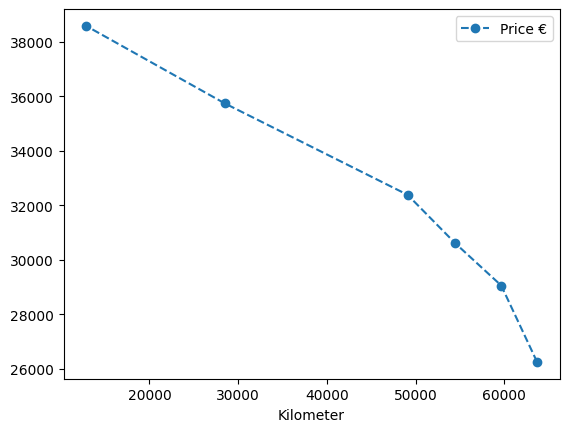

In [12]:
#A graphical look
#Each dot from left to right represents Registration Year from 2024 to 2019, respectively
df.groupby(['Registration Year'])[['Price €', 'Kilometer']].mean().plot(x="Kilometer", y=["Price €"], style='--o')

#We can clearly see that the slope of the line becomes significantly steeper at over 50,000Km ==> which represents the significant drop in value € / Kilometer
#We can quickly conclude that it would be a better decision, in terms of cost effectiveness, to buy a used car older than 3 years, given the conditions stated in the beginning. 

In [52]:
#UPDATE
#It just caught my attention that there might be slight chance that the powerhorse of the car might affect the price (the stronger the car, the more expensive). Although I know this value should be the same for the same model (BMW 320), I still check it to make sure
#Now extract the information from the Power column. Same procedures
df['Powerhorse'] = df['Power'].str.extractall('(\d+)').unstack()[0][1]
df.head()

,Name,Price €,Kilometer,Gear Type,First Registration,Gas Type,Power,Energy Efficiency,Environment Index,CO2,Registration Year,Powerhorse
0,"BMW 320 Baureihe 3 Lim. 320 i Advantage,Sitzhz...",24999.0,53500.0,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None,2019,184
1,BMW 320 320i Gran Turismo Sport Line*Automatik...,23890.0,45383.0,Automatik,05/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None,2020,184
2,BMW 320 i Advantage LED NAVI KAMERA BUSINESS-P...,25900.0,25000.0,Automatik,09/2019,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None,2019,184
3,BMW 320 i Aut. M Sport,29890.0,65900.0,Automatik,06/2020,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None,2020,184
4,BMW 320 i M Sport*Glasdach*ACC*Kamera*AHK*HiFi*,33980.0,54272.0,Automatik,04/2023,Benzin,135 kW (184 PS),- (l/100 km),- (g/km),None,2023,184


In [53]:
#Let's check for the number of frequencies of each possible unique value
#The result is in line with my expectation. 184 PS prevails ==> So, the conclusion above is still valid
df['Powerhorse'].value_counts()

184    392
163      3
156      2
204      1
181      1
Name: Powerhorse, dtype: int64

In [55]:
#Save the DataFrame for later use if any
#It is better for the later comparison, because the link above will give us different results everytime we run the code (the website keeps updating their info, I mean)
df.to_csv('df_autoscout24_Dec_2024.csv')